<a href="https://colab.research.google.com/github/andrewb1243/LSTM-Time-Series-Prediction-CCE/blob/main/LSTM_Vanilla_Network_Emulator_cubic_30sec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as pd
import pandas as pd


file_location = 'https://raw.githubusercontent.com/andrewb1243/Datasets/master/throughput_cubic_60.csv'

first_dataset = pd.read_csv(file_location)

first_dataset.head()

,Time,Throughput
0,3.0,0.001536
1,3.5,0.000000
2,4.0,0.001536
3,4.5,0.000000
4,5.0,1.756608


In [ ]:
first_dataset_indexed = first_dataset.set_index(['Time'])
first_dataset_indexed.head()

,Throughput
Time,
3.0,0.001536
3.5,0.000000
4.0,0.001536
4.5,0.000000
5.0,1.756608


<AxesSubplot:xlabel='Time'>

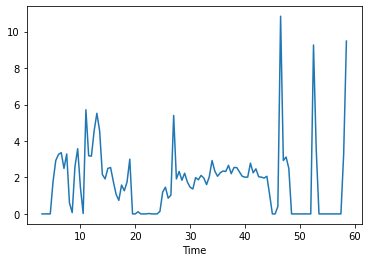

In [ ]:
throughput = first_dataset_indexed["Throughput"]
throughput.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
first_dataset_scaled = scaler.fit_transform(first_dataset_indexed)
print(first_dataset_scaled)


[[1.41672324e-04]
 [0.00000000e+00]
 [1.41672324e-04]
 [0.00000000e+00]
 [1.62020011e-01]
 [2.70062867e-01]
 [3.01053688e-01]
 [3.09908208e-01]
 [2.30217526e-01]
 [3.03267318e-01]
 [5.53407515e-02]
 [6.64089017e-03]
 [2.39072046e-01]
 [3.29830879e-01]
 [1.32817803e-01]
 [2.21363006e-03]
 [5.26843954e-01]
 [2.94412798e-01]
 [2.92199168e-01]
 [4.20589711e-01]
 [5.09134913e-01]
 [4.20589711e-01]
 [1.99226705e-01]
 [1.77090405e-01]
 [2.30217526e-01]
 [2.34644786e-01]
 [1.63808624e-01]
 [9.96133526e-02]
 [6.86225318e-02]
 [1.46099584e-01]
 [1.17322393e-01]
 [1.61594994e-01]
 [2.76703757e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.10681503e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.21363006e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.32817803e-02]
 [1.10681503e-01]
 [1.35031434e-01]
 [7.96906821e-02]
 [9.51860925e-02]
 [4.98066763e-01]
 [1.77090405e-01]
 [2.14722116e-01]
 [1.70449514e-01]
 [2.05867595e-01]
 [1.61594994e-01]
 [1.35031434e-01]
 [1.261769

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(first_dataset_scaled, test_size = 0.10, shuffle = False)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input = 2
n_features = 1

generatorTrain = TimeseriesGenerator(train, train, length=n_input, batch_size=2)
generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [ ]:
print(train)


[[1.41672324e-04]
 [0.00000000e+00]
 [1.41672324e-04]
 [0.00000000e+00]
 [1.62020011e-01]
 [2.70062867e-01]
 [3.01053688e-01]
 [3.09908208e-01]
 [2.30217526e-01]
 [3.03267318e-01]
 [5.53407515e-02]
 [6.64089017e-03]
 [2.39072046e-01]
 [3.29830879e-01]
 [1.32817803e-01]
 [2.21363006e-03]
 [5.26843954e-01]
 [2.94412798e-01]
 [2.92199168e-01]
 [4.20589711e-01]
 [5.09134913e-01]
 [4.20589711e-01]
 [1.99226705e-01]
 [1.77090405e-01]
 [2.30217526e-01]
 [2.34644786e-01]
 [1.63808624e-01]
 [9.96133526e-02]
 [6.86225318e-02]
 [1.46099584e-01]
 [1.17322393e-01]
 [1.61594994e-01]
 [2.76703757e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.10681503e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.21363006e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.32817803e-02]
 [1.10681503e-01]
 [1.35031434e-01]
 [7.96906821e-02]
 [9.51860925e-02]
 [4.98066763e-01]
 [1.77090405e-01]
 [2.14722116e-01]
 [1.70449514e-01]
 [2.05867595e-01]
 [1.61594994e-01]
 [1.35031434e-01]
 [1.261769

In [ ]:
batch_0 = generatorTrain[0]
x ,y = batch_0
print(x,y)

[[[0.00014167]
  [0.        ]]

 [[0.        ]
  [0.00014167]]] [[0.00014167]
 [0.        ]]


In [ ]:
#number of samples
print("Samples: %d" % len(generatorTrain))
#print each sample
for i in range(len(generatorTrain)):
  x, y = generatorTrain[i]
  print('%s => %s' % (x , y))

Samples: 49
[[[0.00014167]
  [0.        ]]

 [[0.        ]
  [0.00014167]]] => [[0.00014167]
 [0.        ]]
[[[1.41672324e-04]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [1.62020011e-01]]] => [[0.16202001]
 [0.27006287]]
[[[0.16202001]
  [0.27006287]]

 [[0.27006287]
  [0.30105369]]] => [[0.30105369]
 [0.30990821]]
[[[0.30105369]
  [0.30990821]]

 [[0.30990821]
  [0.23021753]]] => [[0.23021753]
 [0.30326732]]
[[[0.23021753]
  [0.30326732]]

 [[0.30326732]
  [0.05534075]]] => [[0.05534075]
 [0.00664089]]
[[[0.05534075]
  [0.00664089]]

 [[0.00664089]
  [0.23907205]]] => [[0.23907205]
 [0.32983088]]
[[[0.23907205]
  [0.32983088]]

 [[0.32983088]
  [0.1328178 ]]] => [[0.1328178 ]
 [0.00221363]]
[[[0.1328178 ]
  [0.00221363]]

 [[0.00221363]
  [0.52684395]]] => [[0.52684395]
 [0.2944128 ]]
[[[0.52684395]
  [0.2944128 ]]

 [[0.2944128 ]
  [0.29219917]]] => [[0.29219917]
 [0.42058971]]
[[[0.29219917]
  [0.42058971]]

 [[0.42058971]
  [0.50913491]]] => [[0.50913491]
 [0.42058971]]
[[[0.5091349

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 

In [ ]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(300, activation = 'tanh',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 300)               362400    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(generatorTrain, epochs=100, batch_size=15, shuffle=False)


Epoch 1/100
49/49 [==============================] - 3s 11ms/step - loss: 0.0321
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0265
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0263
Epoch 4/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0261
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0260
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0258
Epoch 7/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0257
Epoch 8/100
49/49 [==============================] - 1s 14ms/step - loss: 0.0256
Epoch 9/100
49/49 [==============================] - 1s 16ms/step - loss: 0.0255
Epoch 10/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0254
Epoch 11/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0254
Epoch 12/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0253
Epoch 13/100
49/49 [=====

In [ ]:
import numpy as np

predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
print(current_batch)

for i in range(len(test)):
  #get the prediction value for first
  current_pred = model.predict(current_batch)[0]

  #append the prediction into array
  predictions.append(current_pred)

  #remove the first value
  current_batch_rmv_frist = current_batch[:,1:,:]
  #update the batch
  current_batch = np.append(current_batch_rmv_frist,[[current_pred]],axis=1)

print([i[0] for i in predictions])


[[[0.       ]
  [0.8544612]]]
1/1 [==============================] - 0s 35ms/step
[0.3678216, 0.29082873, 0.22833216, 0.1992541, 0.18608652, 0.18040398, 0.17801188, 0.17701687, 0.17660525, 0.17643538, 0.1763653, 0.17633635]


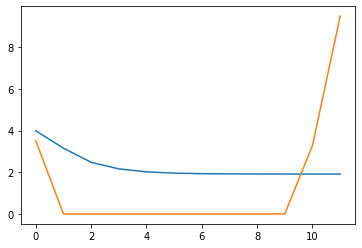

In [ ]:
import matplotlib.pyplot as plt

predictions_actual_size = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_size)
plt.plot(test_data_actual_scale)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

mean_squared_error(test,predictions)

0.0038322371880406465

In [ ]:
import pickle

#save
with open('VanillaEpoch300.pkl','wb') as f:
  pickle.dump(model,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-09 05:24:51      4372712
config.json                                    2023-03-09 05:24:51         1786
metadata.json                                  2023-03-09 05:24:51           64
